In [1]:
%cd /mnt/ssd_1/DDOPaI
import random
import numpy as np
import torch
from models.model_base import ModelBase
from models.base.init_utils import weights_init
from utils.data_utils import get_dataloader
from utils.network_utils import get_network
from utils.dict import DictToObj
from pruner.SNIP import SNIP
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import matplotlib.colors as mcolors
mcolors.CSS4_COLORS
from matplotlib.gridspec import GridSpec

/mnt/ssd_1/DDOPaI


In [2]:
config_dict={
    "network": "vgg",
    "depth": 11,
    "dataset": "tiny_imagenet",
    "batch_size": 128,
    "epoch": "300",
    "learning_rate": "0.1",
    "weight_decay": "5e-4",
    "exception": "-1",
    "iterations": 1,
    "normalize": False,
    "target_ratio": 0.99,
    "samples_per_class": 1,
    "num_iters": 10,
    "prune_material":"img",
    "brightness": 255,
    "seed":1,
    "brightness_ablation": 1
  }
classes= {
    'cifar10': 10,
    'cifar100': 100,
    'mnist': 10,
    'tiny_imagenet': 200
}
config=DictToObj(config_dict)
BRIGHTNESS=[255,50,2,1,0.5,0.2,0.05,0.005,0]
MASKS={}
COLORLIST=['#053061','#1e61a5','#3c8abe','#7bb6d6','#fac8af','#eb9172','#cf5246','#ab162a','#67001f','#007700']
MARKERS=['o','D','X','p','v','s','P','d','^','*','<','>','h','H','8','1','2','3','4','+','x','|','_']
linestyle=['-', '--', '-', '--', '-', '--', '-', '--', '-', '--']
IFCOLOR=True

In [3]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
setup_seed(config["seed"])

In [4]:
model = get_network(config["network"], config["depth"], config["dataset"], use_bn=config.get('use_bn', True))
ratio = 1 - (1 - config["target_ratio"]) ** (1.0 / config["iterations"])
trainloader, testloader = get_dataloader(config["dataset"], config["batch_size"], 256, 4)
for br in BRIGHTNESS:
    config.brightness=br
    mask = None
    mb = ModelBase(config["network"], config["depth"], config["dataset"],model)
    mb.cuda()

    if mask is not None:
        mb.register_mask(mask)

    mb.model.apply(weights_init)
    masks = SNIP(mb.model, ratio,trainloader, 'cuda',config,num_classes=classes[config["dataset"]],
                            samples_per_class=config["samples_per_class"],
                            num_iters=config.get('num_iters', 1))
    mb.masks=masks
    MASKS[br]=mb.get_ratio_at_each_layer()

Use batch norm is: True
The 200 samples have pruned
The 400 samples have pruned
The 600 samples have pruned
The 800 samples have pruned
The 1000 samples have pruned
The 1200 samples have pruned
The 1400 samples have pruned
The 1600 samples have pruned
The 1800 samples have pruned
The 2000 samples have pruned
** norm factor: tensor(70.3656, device='cuda:0')
** accept:  tensor(8.5420e-07, device='cuda:0')
tensor(93201, device='cuda:0')
The 200 samples have pruned
The 400 samples have pruned
The 600 samples have pruned
The 800 samples have pruned
The 1000 samples have pruned
The 1200 samples have pruned
The 1400 samples have pruned
The 1600 samples have pruned
The 1800 samples have pruned
The 2000 samples have pruned
** norm factor: tensor(72.6510, device='cuda:0')
** accept:  tensor(8.6109e-07, device='cuda:0')
tensor(93201, device='cuda:0')
The 200 samples have pruned
The 400 samples have pruned
The 600 samples have pruned
The 800 samples have pruned
The 1000 samples have pruned
The 120

In [5]:
for k,v in MASKS.items():
  MASKS[k]=np.array(list(v.values())[:-1])
print(MASKS)

{255: array([7.66782403e+01, 2.56374776e+01, 9.01658833e+00, 2.72945836e+00,
       7.89303239e-01, 7.26487895e-02, 1.24062435e-01, 1.13593205e-01,
       1.33320317e+01]), 50: array([7.41319478e+01, 2.63522685e+01, 9.45231095e+00, 2.80575231e+00,
       8.02188460e-01, 8.07444274e-02, 8.87976785e-02, 7.30726460e-02,
       1.25771478e+01]), 2: array([7.71412015e+01, 3.01161021e+01, 1.02996826e+01, 2.95291487e+00,
       5.86276595e-01, 5.90854208e-02, 7.01904297e-02, 5.70933043e-02,
       1.03115231e+01]), 1: array([7.85879612e+01, 3.13286692e+01, 9.24716517e+00, 2.80507412e+00,
       5.79918781e-01, 6.66724343e-02, 6.64181192e-02, 6.84526225e-02,
       1.30205080e+01]), 0.5: array([7.71990776e+01, 2.93714732e+01, 9.24750417e+00, 2.92188860e+00,
       6.56806119e-01, 7.92185485e-02, 8.15497537e-02, 7.56157795e-02,
       1.20908201e+01]), 0.2: array([7.65046299e+01, 3.06287974e+01, 1.02583148e+01, 3.18027064e+00,
       6.27475325e-01, 5.60760498e-02, 4.50981985e-02, 3.22129985e-0

/tmp/ipykernel_3172153/187711098.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
/tmp/ipykernel_3172153/187711098.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


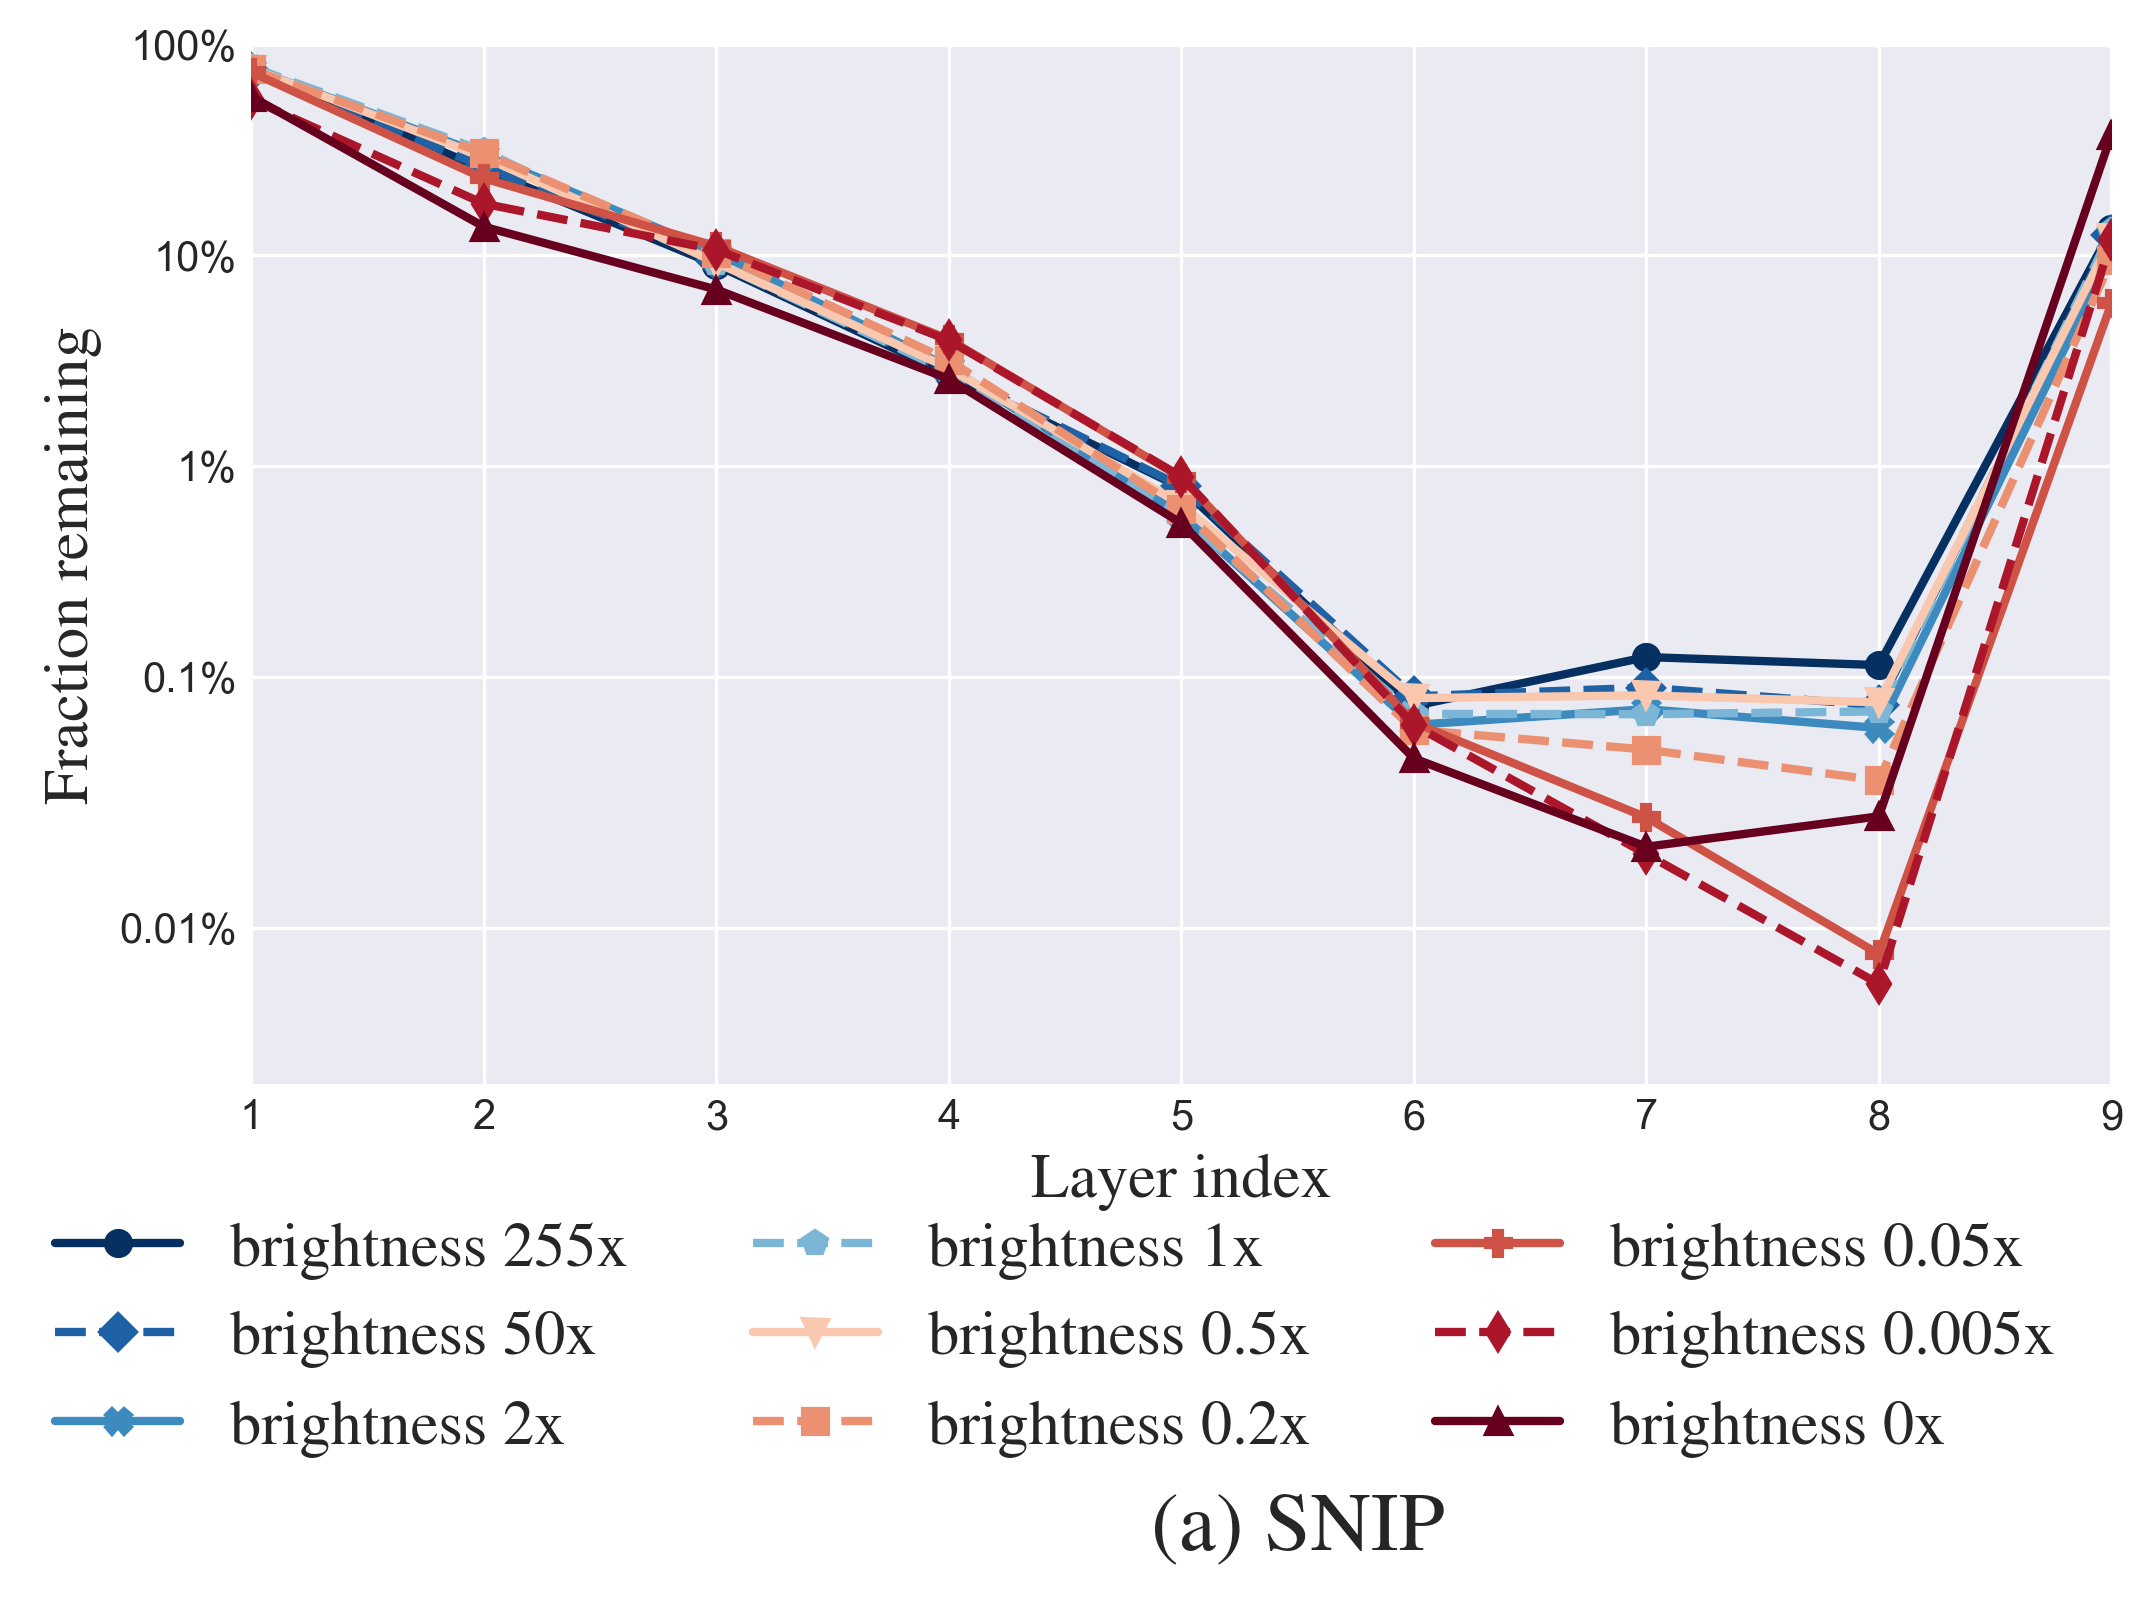

In [6]:
ratiolist=MASKS

font1 = {
    'weight' : 'normal',
    'size'   : 15,
     "family":'Nimbus Roman'
    }


iters=list(range(ratiolist[BRIGHTNESS[0]].shape[0]))
fig=plt.figure(figsize=(8,4.5),dpi=300)
#plt.style.use('seaborn-white')
plt.style.use('seaborn-darkgrid')
grid = GridSpec(1, 4, wspace=0.5)

# set ax2 properties
ax2=plt.subplot(grid[0, 0:])
my_x_ticks = np.arange(0, 18, 1)
ax2.set_xticks(my_x_ticks)
ax2.set_yscale('symlog', linthresh=0.015)

ax2.set_xlim(1,9)
ax2.set_ylim(0,100)

ax2.set_xlabel('Layer index',font1)

ax2.set_xlabel('Layer index',font1)
ax2.set_ylabel('Fraction remaining',font1)

values = np.array([0.01,0.1,1,10,100])
ax2.set_yticks( values, ['0.01%','0.1%','1%','10%','100%'] )


for i,value in enumerate(BRIGHTNESS):
    
    label='brightness %sx' % (str(value))
    ax2.plot([i + 1 for i in iters], ratiolist[value], 
                    color=COLORLIST[i],
                    label=label,linewidth=2.0
                    ,zorder=1,marker=MARKERS[i],linestyle=linestyle[i])

     
fig.text(0.5, -0.22, '(a) SNIP',fontsize=font1['size']+5,font='Nimbus Roman', va='center')
fig.legend(prop=font1,bbox_to_anchor=(0.9, 0.05),ncol=3)
plt.tight_layout() 